## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

## Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


## Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

## Model

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

## Convolutional Layer

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500, activation='relu'))

In [16]:
model.add(Dropout(0.4))

## Output Layer

In [17]:
model.add(Dense(units=38, activation='softmax'))

## Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [20]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 493s 223ms/step - accuracy: 0.3939 - loss: 2.1531 - val_accuracy: 0.7963 - val_loss: 0.6321
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 509s 232ms/step - accuracy: 0.8066 - loss: 0.6371 - val_accuracy: 0.8928 - val_loss: 0.3425
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 443s 202ms/step - accuracy: 0.8828 - loss: 0.3930 - val_accuracy: 0.9309 - val_loss: 0.2234
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 451s 205ms/step - accuracy: 0.9155 - loss: 0.2875 - val_accuracy: 0.9283 - val_loss: 0.2155
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 460s 209ms/step - accuracy: 0.9330 - loss: 0.2243 - val_accuracy: 0.9390 - val_loss: 0.2225
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 463s 211ms/step - accuracy: 0.9429 - loss: 0.1984 - val_accuracy: 0.9175 - val_loss: 0.2981
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 478s 217ms/step - accuracy: 0.9526 - loss: 0.1662 - val_accuracy: 0.9473 - val_loss: 0.1989
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 454s 207ms/step - ac

## Evaluating Model

In [21]:
training_loss, training_accuracy = model.evaluate(training_set)
print('Training accuracy:', training_accuracy)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 99s 45ms/step - accuracy: 0.9855 - loss: 0.0465
Training accuracy: 0.9868553876876831


In [22]:
validation_loss, validation_accuracy = model.evaluate(validation_set)
print('Validation accuracy:', validation_accuracy)

550/550 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.9623 - loss: 0.1627
Validation accuracy: 0.9613589644432068


## Saving Model

In [23]:
model.save('trained_plant_disease_model.keras')

In [24]:
model.save('trained_plant_disease_model.h5')

In [25]:
training_history.history

{'accuracy': [0.5836830735206604,
  0.8297033905982971,
  0.8917135000228882,
  0.9193541407585144,
  0.93473219871521,
  0.946795642375946,
  0.9543779492378235,
  0.9622448086738586,
  0.9658154845237732,
  0.971463143825531],
 'loss': [1.4306857585906982,
  0.5624768733978271,
  0.36099472641944885,
  0.2718954086303711,
  0.21709518134593964,
  0.18298719823360443,
  0.15860462188720703,
  0.13106697797775269,
  0.12270461022853851,
  0.09922043234109879],
 'val_accuracy': [0.7963237166404724,
  0.8927839994430542,
  0.930855929851532,
  0.9282950162887573,
  0.9389938712120056,
  0.9174823760986328,
  0.947302520275116,
  0.9629524350166321,
  0.9562371969223022,
  0.9613589644432068],
 'val_loss': [0.6320702433586121,
  0.3424875736236572,
  0.22340886294841766,
  0.21550075709819794,
  0.22246244549751282,
  0.298128217458725,
  0.19890271127223969,
  0.13417021930217743,
  0.1593274027109146,
  0.15719857811927795]}

In [26]:
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

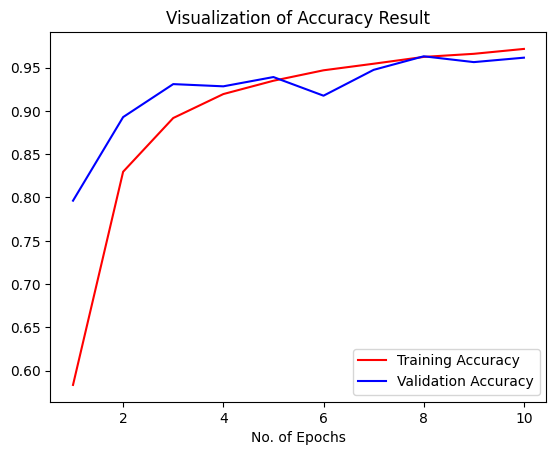

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [29]:
class_name = validation_set.class_names

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [31]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 126s 7ms/step


(array([[1.0000000e+00, 3.5012376e-15, 4.0587807e-15, ..., 9.5234854e-23,
         2.0927356e-22, 1.9799041e-22],
        [1.0000000e+00, 3.6058604e-11, 3.2287584e-12, ..., 4.8742402e-17,
         2.8695374e-20, 7.8496422e-20],
        [1.0000000e+00, 2.4376571e-14, 1.4067235e-14, ..., 2.9501324e-26,
         5.8690178e-23, 9.8759556e-24],
        ...,
        [5.6907089e-14, 4.3599833e-17, 3.2342488e-13, ..., 4.7921600e-13,
         1.0385114e-15, 1.0000000e+00],
        [2.3443096e-12, 9.5447939e-16, 3.7715816e-13, ..., 1.4301349e-11,
         4.2893675e-13, 9.9999976e-01],
        [5.0491963e-36, 1.6259315e-36, 5.9475721e-35, ..., 0.0000000e+00,
         1.0734025e-33, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [32]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [33]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

2025-04-14 20:08:56.370740: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
cm = confusion_matrix(Y_true,predicted_categories)

In [36]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.97      0.97       504
                                 Apple___Black_rot       1.00      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.96      0.97      0.96       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.94      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.82      0.89       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.87      0.99      0.

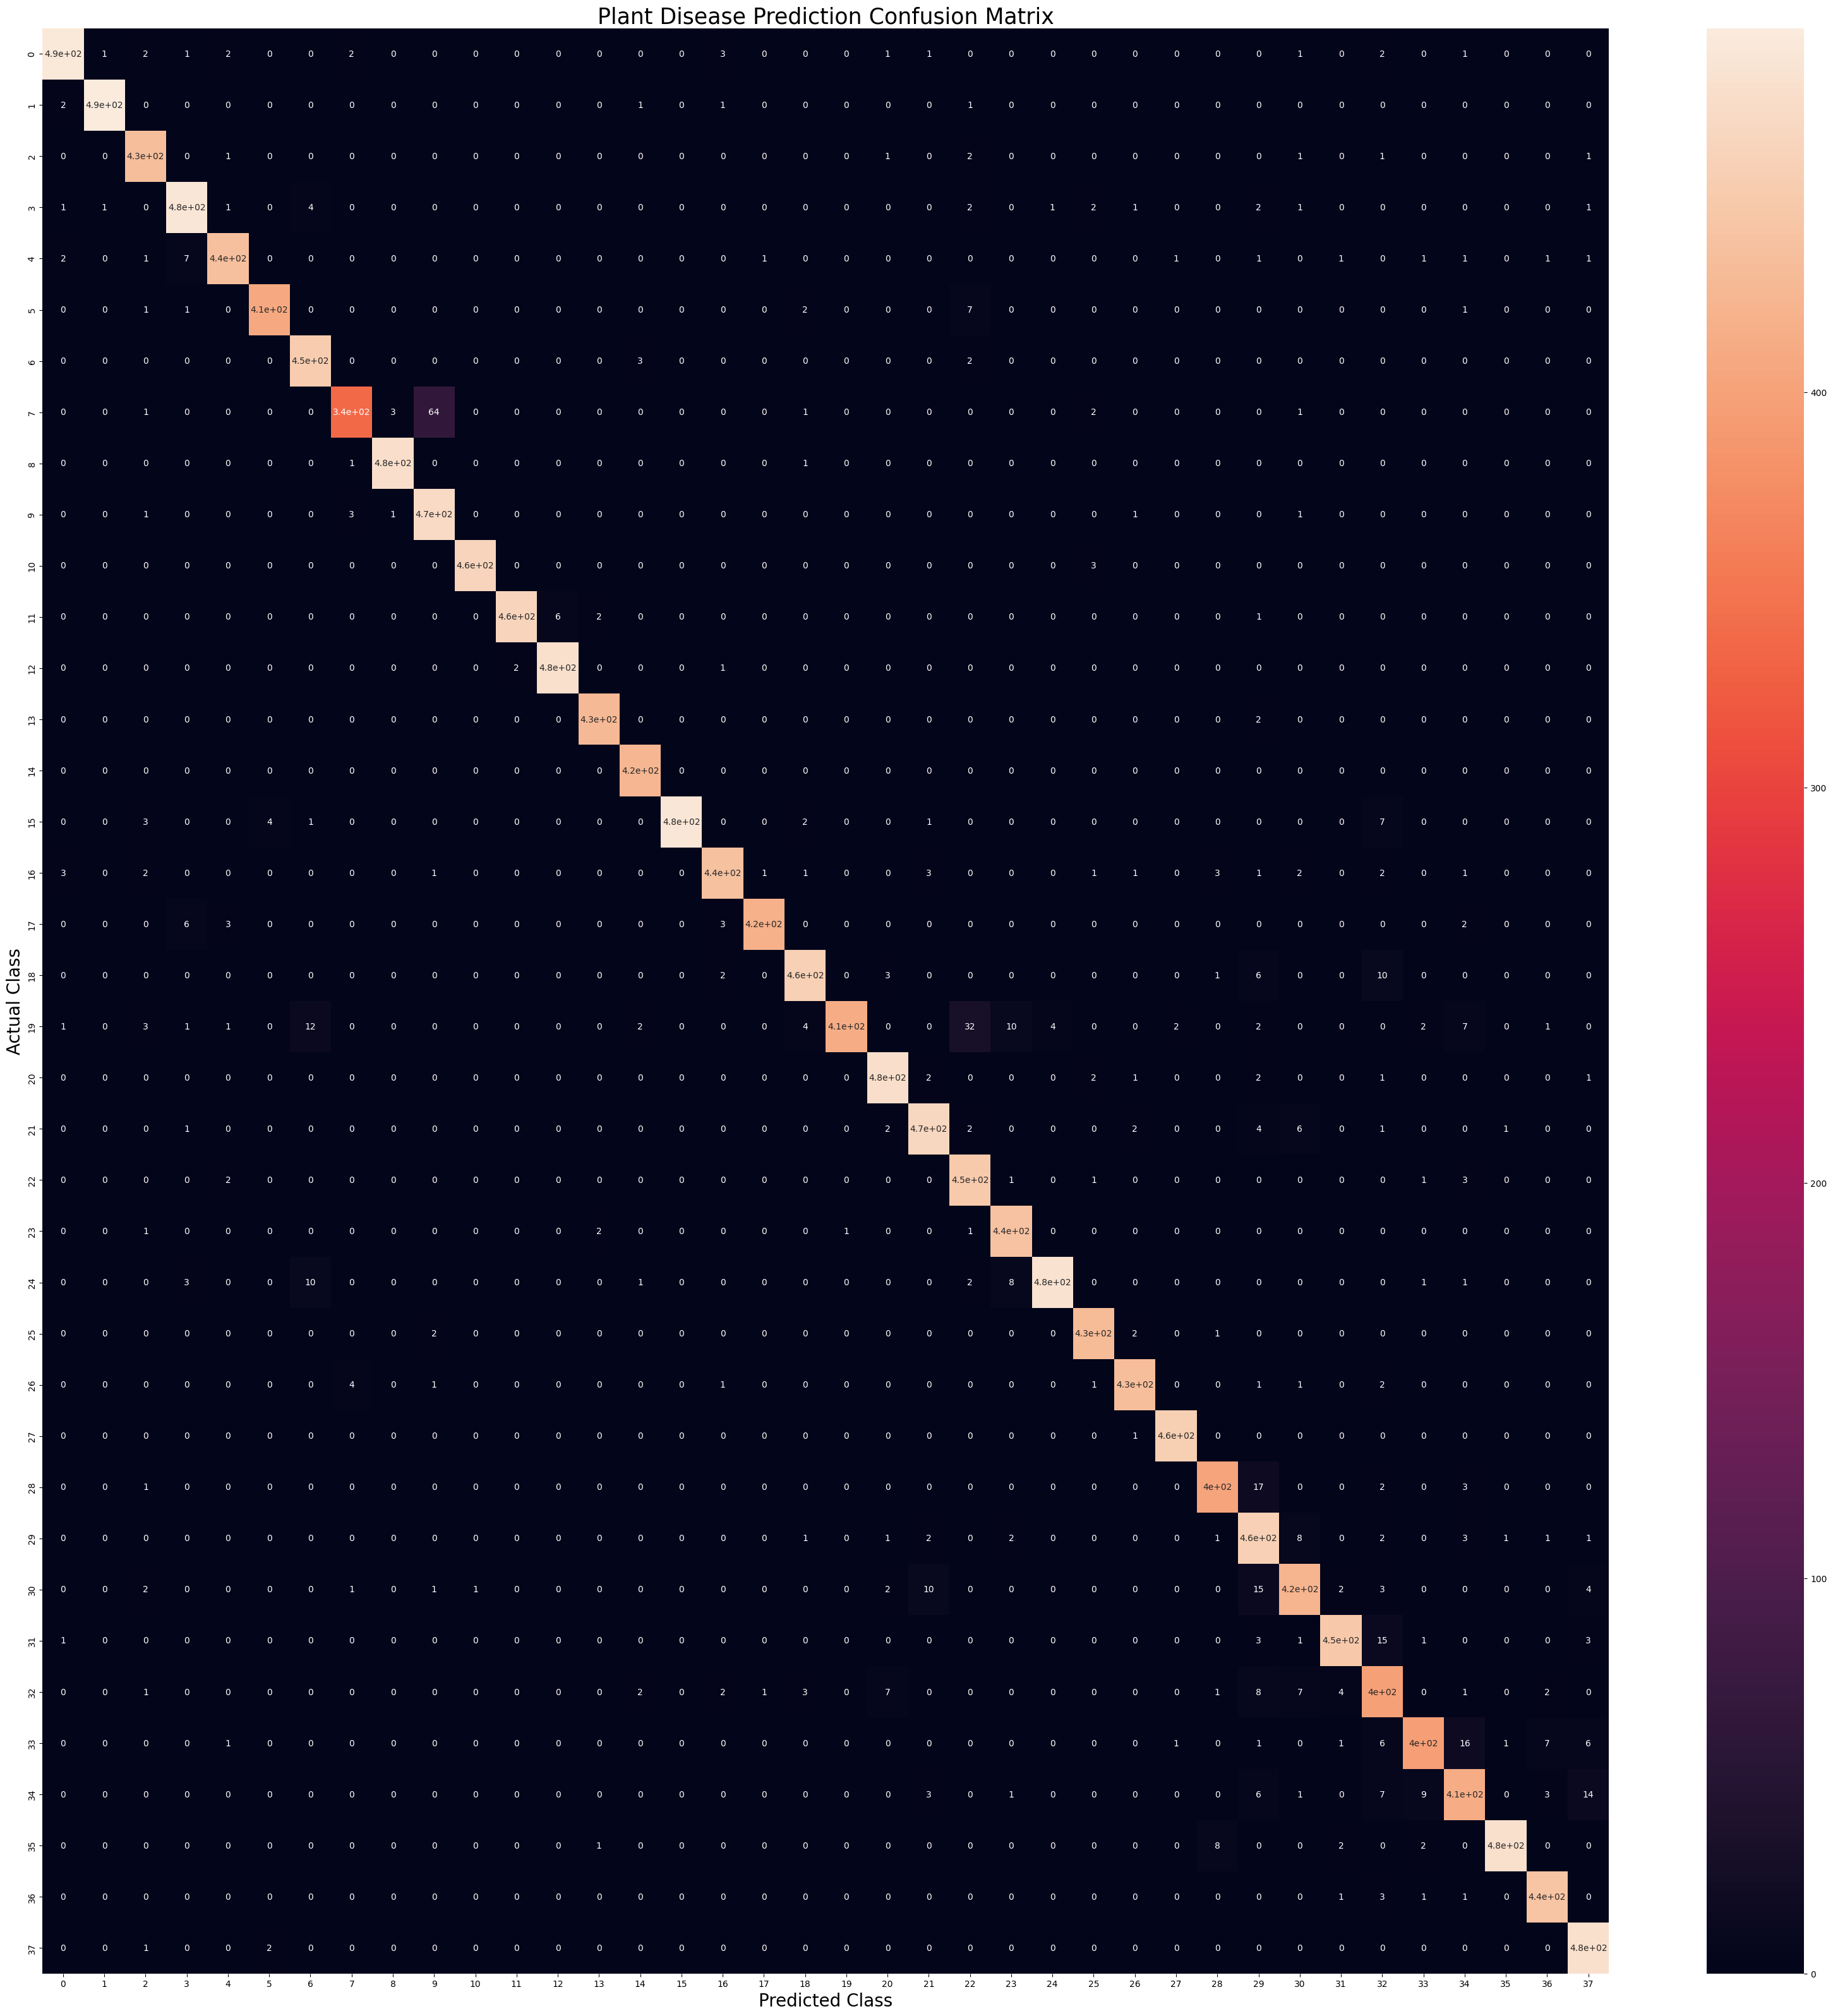

In [37]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()